In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_white

df = pd.read_csv('C:/Users/User/Documents/Flatiron/Phase2/cleaned_data.csv')
df2 = pd.read_csv('C:/Users/User/Documents/Flatiron/Phase2/final_df.csv')

# Baseline Model

In [2]:
df = df.drop(columns = ['Unnamed: 0', 'id', 'sqft_living15', 'sqft_lot15'])

In [3]:
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [4]:
formula

'price~Month+bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+has_renovated+zipcode+lat+long'

In [5]:
model1 = ols(formula=formula, data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2743.
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:02:15   Log-Likelihood:            -2.5574e+05
No. Observations:               18748   AIC:                         5.115e+05
Df Residuals:                   18731   BIC:                         5.117e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.946e+06   3.12e+06      2.550      0.011    1.84e+06    1.41e+07
Month         -3052.2864    476.924     -6.400      0.000   -3987.101   -2117.472
bedrooms      -4.086e+04   2151.915    -18.988      0.000   -4.51e+04   -3.66e+04
bathrooms      4.116e+04   3546.227     11.608      0.000    3.42e+04    4.81e+04
sqft_living     119.9235      2.324     51.608      0.000     115.369     124.478
sqft_lot         -0.0814      0.038     -2.136      0.033      -0.156      -0.007
floors         5340.9601   3880.346      1.376      0.169   -2264.870    1.29e+04
waterfront      6.04e+05   1.89e+04     32.022      0.000    5.67e+05    6.41e+05
view           5.386e+04   2302.880     23.386      0.000    4.93e+04    5.84e+04
condition      2.754e+04   2542.663     10.831      0.000    2.26e+04    3.25e+04
grade          9.802e+04   2236.824     43.823      0.000    9.36e+04    1.02e+05
sqft_above       77.8899      2.314     33.655      0.000      73.354      82.426
sqft_basement    42.0332      2.871     14.639      0.000      36.405      47.661
yr_built      -2615.0283     77.451    -33.764      0.000   -2766.839   -2463.217
has_renovated  4.327e+04   8653.518      5.000      0.000    2.63e+04    6.02e+04
zipcode        -595.1064     35.637    -16.699      0.000    -664.958    -525.255
lat            6.061e+05   1.16e+04     52.129      0.000    5.83e+05    6.29e+05
long          -2.134e+05    1.4e+04    -15.216      0.000   -2.41e+05   -1.86e+05
==============================================================================
Omnibus:                    15745.730   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1542035.812
Skew:                           3.501   Prob(JB):                         0.00
Kurtosis:                      46.875   Cond. No.                     1.24e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.2e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Observations

- <b>R-Squared</b>: The R-squared value of the baseline model is 0.701. This is a a good sign because it indicates a high level of correlation between the dependent variable ```price``` and the other independent variables listed.
- <b>High P-Values</b>: There is one instance of a P value greater than 0.05: ```floors```. This leads me to believe that there is insufficient evidence to conclude that changes to  ```floors``` will have an impact on ```price``` at the population level.
- <b>Negative Coefficients</b>: There are four instances where the coefficient values of the appeared negative for the following independent variables: ```Month```, ```bedrooms```, ```sqft_lot```, and ```yr_built```. These findings provide insight that as the independent variables increases, the dependent variable, ```price```, tends to decrease.
- <b>Skew</b>: The skewness of this model is quite high and positive, 3.501. This tells me that the mean and median values of my data are higher than its mode.
- <b>Kurtosis</b>: The kurtosis of this model is very high, 46.875, so it can be classified as leptokurtic. This tells me that there are significant outliers in my data sample.

## Linear Regression Model

In [6]:
df2

,Unnamed: 0,id,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,Zipcode_98146,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199
0,0,7129300520,4,221900,3,1.00,1180,5650,1.0,NaN,...,0,0,0,0,0,0,1,0,0,0
1,1,6414100192,4,538000,3,2.25,2570,7242,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,5631500400,1,180000,2,1.00,770,10000,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,2487200875,4,604000,4,3.00,1960,5000,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,1954400510,1,510000,3,2.00,1680,8080,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21137,21137,263000018,2,360000,3,2.50,1530,1131,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
21138,21138,6600060120,1,400000,4,2.50,2310,5813,2.0,0.0,...,1,0,0,0,0,0,0,0,0,0
21139,21139,1523300141,2,402101,2,1.00,1020,1350,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
21140,21140,291310100,1,400000,3,2.50,1600,2388,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df2.columns = df2.columns.str.replace(".","")
#df2.columns = df2.columns.str.replace(" ","")

In [8]:
df2

,Unnamed: 0,id,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,Zipcode_98146,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199
0,0,7129300520,4,221900,3,1.00,1180,5650,1.0,NaN,...,0,0,0,0,0,0,1,0,0,0
1,1,6414100192,4,538000,3,2.25,2570,7242,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,5631500400,1,180000,2,1.00,770,10000,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3,2487200875,4,604000,4,3.00,1960,5000,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,4,1954400510,1,510000,3,2.00,1680,8080,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21137,21137,263000018,2,360000,3,2.50,1530,1131,3.0,0.0,...,0,0,0,0,0,0,0,0,0,0
21138,21138,6600060120,1,400000,4,2.50,2310,5813,2.0,0.0,...,1,0,0,0,0,0,0,0,0,0
21139,21139,1523300141,2,402101,2,1.00,1020,1350,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
21140,21140,291310100,1,400000,3,2.50,1600,2388,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [9]:
outcome = 'price'
predictors = df2.drop(columns = ['price','Unnamed: 0', 'id'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula1 = outcome + '~' + pred_sum

In [10]:
formula1

'price~Month+bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_basement+yr_built+has_renovated+zipcode+lat+long+quarter_bins+bedroom_bins+bathrooms_bins+floors_bins+grade_bins+age_bins+quarter_2Q2+quarter_3Q3+quarter_4Q4+bedrooms_2Medium+bedrooms_3Large+bathroom_2Medium+bathroom_3Large+floors_2Two+floors_3Three+Waterfront_10+View_1+View_2+View_3+View_4+Condition_2+Condition_3+Condition_4+Condition_5+grade_2Average+grade_3AboveAverage+grade_4Excellent+age_2Modern+age_3New+Has_Renovated_1+Zipcode_98002+Zipcode_98003+Zipcode_98004+Zipcode_98005+Zipcode_98006+Zipcode_98007+Zipcode_98008+Zipcode_98010+Zipcode_98011+Zipcode_98014+Zipcode_98019+Zipcode_98022+Zipcode_98023+Zipcode_98024+Zipcode_98027+Zipcode_98028+Zipcode_98029+Zipcode_98030+Zipcode_98031+Zipcode_98032+Zipcode_98033+Zipcode_98034+Zipcode_98038+Zipcode_98039+Zipcode_98040+Zipcode_98042+Zipcode_98045+Zipcode_98052+Zipcode_98053+Zipcode_98055+Zipcode_98056+Zipcode_98058+Zipcode_98059+Zipcode_9806

In [11]:
model2 = ols(formula=formula1, data=df2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     868.5
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:02:16   Log-Likelihood:            -2.5140e+05
No. Observations:               18802   AIC:                         5.030e+05
Df Residuals:                   18698   BIC:                         5.038e+05
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     -1.04e+04    983.483    -10.574      0.000   -1.23e+04   -8471.247
quarter_bins[T.2.Q2]          3308.4515   1283.974      2.577      0.010     791.745    5825.158
quarter_bins[T.3.Q3]         -3205.8675   1004.077     -3.193      0.001   -5173.951   -1237.785
quarter_bins[T.4.Q4]          1861.2060    736.145      2.528      0.011     418.295    3304.117
bedroom_bins[T.2.Medium]      8964.1723   2348.906      3.816      0.000    4360.103    1.36e+04
bedroom_bins[T.3.Large]       1.107e+04   6519.358      1.698      0.090   -1709.523    2.38e+04
bathrooms_bins[T.2.Medium]   -1.122e+04   2124.870     -5.279      0.000   -1.54e+04   -7052.929
bathrooms_bins[T.3.Large]     2.335e+05   1.42e+04     16.421      0.000    2.06e+05    2.61e+05
floors_bins[T.2.Two]         -6562.8585   4508.896     -1.456      0.146   -1.54e+04    2274.987
floors_bins[T.3.Three]       -2.192e+04   9633.735     -2.275      0.023   -4.08e+04   -3036.619
grade_bins[T.2.Average]      -3.206e+04   2764.842    -11.595      0.000   -3.75e+04   -2.66e+04
grade_bins[T.3.AboveAverage] -1.961e+04   4762.910     -4.116      0.000   -2.89e+04   -1.03e+04
grade_bins[T.4.Excellent]     1.032e+05   7872.807     13.113      0.000    8.78e+04    1.19e+05
age_bins[T.2.Modern]          5569.9912   2459.655      2.265      0.024     748.845    1.04e+04
age_bins[T.3.New]             3.102e+04   3877.649      7.999      0.000    2.34e+04    3.86e+04
Month                        -7918.6291   1131.219     -7.000      0.000   -1.01e+04   -5701.338
bedrooms                     -2.418e+04   2210.856    -10.938      0.000   -2.85e+04   -1.98e+04
bathrooms                     2.774e+04   3409.163      8.137      0.000    2.11e+04    3.44e+04
sqft_living                    186.2692      3.095     60.181      0.000     180.202     192.336
sqft_lot                         0.1662      0.031      5.390      0.000       0.106       0.227
floors                       -1.795e+04   9064.322     -1.980      0.048   -3.57e+04    -180.669
waterfront                    3.049e+05   8318.956     36.650      0.000    2.89e+05    3.21e+05
view                          5.978e+04   1940.062     30.812      0.000     5.6e+04    6.36e+04
condition                     2.847e+04   1.03e+04      2.754      0.006    8204.677    4.87e+04
grade                         5.261e+04   2875.380     18.297      0.000     4.7e+04    5.82e+04
sqft_basement                  -54.7570      3.881    -14.110      0.000     -62.364     -47.150
yr_built                      -632.3736     92.790     -6.815      0.000    -814.251    -450.497
has_renovated                 2.333e+04   3365.863      6.932      0.000    1.67e+04    2.99e+04
zipcode                       -313.2217     65.410     -4.789      0.000    

## General Observations
- <b>R-Squared</b>: The R-squared value of this linear regression model is 0.827. This is a a good sign because it indicates a high level of correlation between the dependent variable price and the other independent variables listed.
- <b>High P-Values</b>: There are multiple instances of high P-values in this model: ```bedroom_bins[T.Small]```, ```floors_bins[T.Two Story]```, ```grade_bins[T.Average]```, ```bedrooms```, ```sqft_lot```, ```sqft_basement```, ```Bedrooms_2/5/6/7/9/10/11```, ```Bathrooms_125/375/55/575/625```, ```Floors_30/35```, ```View_3```, and ```Condition_2/3/5```. The magnitutde of these P-values range from borderline, 0.05, to near maximum, 0.986. What this means is that there is insufficient evidences to conclude that changes to the identified independent variables will have an impact to the dependent variable, ```price```, at the population level.
- <b>Differences From Baseline Model</b>: 


### Observations on ```seaons_bins``` & ```Month```
- <b>P-Values</b>: The P-values for these independent variables are extremely low, meaning there is sufficient evidence to conclude that changes to these independent variables will have an impact to the dependent variable, ```price```, at the population level.
- <b>Coefficients</b>: The ```seasons_bins[T.Spring]/[T.Summer]/[T.Winter]``` variables were compared against ```seasons_bins[T.Fall]``` in regard to their coefficient value changes. It is shown that the variables ```seasons_bins[T.Spring]/[T.Summer]``` are positive indicating that the ```price``` variable will increase when compared to ```seasons_bins[T.Fall]```. Conversely, ```seasons_bins[T.Winter]``` is negative indicating that the ```price``` variable will decrease when compared to ```seasons_bins[T.Fall]```.


### Observations on ```bedroom_bins``` & ```bedrooms```
- <b>P-Values</b>: The P-value for ```bedroom_bins[T.Medium]``` is extremely low, 0.000, meaning there is sufficient evidence to conclude that changes to this independent variable will have an impact to the dependent variable, ```price```, at the population level. Conversely, the P-value for ```bedroom_bins[T.Small]``` is fairly large, 0.117, meaning there is not sufficient evidence to conclude that changes to this independent variable will have an impact to the dependent variable, ```price```, at the population level.
- <b>Coefficients</b>: The ```bedroom_bins[T.Small]/[T.Medium]``` variables were compared against ```bedroom_bins[T.Large]``` in regard to their coefficient value changes. It is shown the the two variables are positive indicating that the ```price``` variable will increase comparatively as the number of bedrooms decreases comparatively. 

### Observations on ```bathroom_bins``` & ```bathrooms```
- <b>P-Values(```bathroom_bins```)</b>: The P-values for these independent variables are low, meaning there is sufficient evidence to conclude that changes to these independent variables will have an impact to the dependent variable, ```price```, at the population level.
- <b>P-Values(```Bathrooms_##)```</b>: The P-values for some of these independent variables are above the threshold of 0.05: ```Bathrooms_125/375/55/575/625```. This may be accounted for the small sample size from these variables, however there is not sufficient evidence to conclude that changes to these independent variables will have an impact to the dependent variable, ```price```, at the population level.
- <b>Coefficients(```bathroom_bins```)</b>: The ```bathroom_bins[T.Medium]/[T.Small]``` variables were compared against ```bathroom_bins[T.Large]``` in regard to their coefficient value changes. It is shown that the ```bathroom_bins[T.Small]``` coefficient value is positive, indicating that the ```price``` variable will increase comparatively if number of bathrooms is 1-2 bathrooms. Conversely, ```bathrooms_bins[T.Medium]``` coefficient value is negative, indicating that the ```price``` variable will decrease if the number of bathrooms is 2.25-5.
- <b>Coefficients(```Bathrooms_###```)</b>: The ```Bathrooms_###``` variables were compared against ```Bathrooms_10``` in regard to their coefficient value changes. It is shown that the ```Bathrooms_225/25/275/30/325/475/60/775/80``` coefficient values are positive, indicating that the ```price``` variable will increase comparatively if the number of bathrooms increases to 2.25, 2.5, 2.75, 3, 3.25, 4.75, 6, 7.75, and 8 respectively. Conversely, ```Bathrooms_125/15/175/20/35/375/40/425/45/50/525/55/575/625/65/675/75``` coefficient values are negative, indicating that the ```price``` variables will decrease comparitevly if the number of bathrooms increases to 1.25, 1.5, 1.75, 2, 3.5, 3.75, 4, 4.25, 4.5, 5, 5.25, 5.5, 5.75, 6.25, 6.5, 6.75, and 7.5 respectively.

### Observations on ```floors_bins``` & ```Floors_##```
- <b>P-Values(```floors_bins```)</b>: The P-values for ```floors_bins[T.Three Story]``` is low, meaning there is sufficient evidence to conclude that changes to this independent variable will have an impact to the dependent variable, ```price```, at the population level. Conversely, the P-value for ```floors_bins[T.Two Story]``` is high, 0.478, meaning there is not sufficient evidence to conclude that changes to this independent variable will have an impact to the dependent variable, ```price```, at the population level.
- <b>P-Values(```Floors_##```)</b>: The P-values for ```Floors_15/20/25/30/35``` were evaluated against ```Floors_10```. It was found that ```Floors_15/20/25``` had P-values below the threshold of 0.05, meaning there is sufficient evidence to conclude that changes to this independent variable will have an impact to the dependent variable, ```price```, at the population level. However, ```Floors_30/35``` had P-values above the threshold, meaning there is not sufficient evidence to conclude that changes to this independent variable will have an impact to the dependent variable, ```price```, at the population level.
- <b>Coefficients(```floors_bins```)</b>: The coefficients for ```floors_bins[T.Two Story]/[T.Three Story]``` are negative comparatively to ```floors_bins[T.One Story]```, indicating that the ```price``` variable will decrease as the number of floors increases.
- <b>Coefficients(```Floors_##```)</b>: The coefficients for ```Floors_15/20/25/30/35``` were evaluated against ```Floors_10```. It was found that ```Floors_15/20/30``` had negative coefficient values, indicating that the ```price``` variable will decrease comparatively if the number of floors is 1.5, 2, or 3. Conversely, ```Floors_25/35``` had positive coefficient values, indicating that the ```price``` variable will increase comparatively if the number of floors is 2.5 or 3.5.

### Observations on ```grade_bins``` & ```Grade_##```
- <b>P-Values(```grade_bins```)</b>: The P-values for ```grade_bins[T.Poor]/[T.Excellent]``` are low, meaning there is sufficient evidence to conclude that changes to these independent variables will have an impact to the dependent variable, ```price```, at the population level. Conversely, the P-value for ```grade_bins[T.Average]``` is high, 0.111, meaning there is not sufficient evidence to conclude that changes to this independent variable will have an impact to the dependent variable, ```price```, at the population level.
- <b>P-Values(```Grade_##```)</b>: The P-values for ```Grade_4/5/6/7/8/9/10/11/12/13``` were evaluated against ```Grade_3```. It was found that all the ```Grade_##``` had P-values below the threshold of 0.05, meaning there is sufficient evidence to conclude that changes to this independent variable will have an impact to the dependent variable, ```price```, at the population level. 
- <b>Coefficients(```grade_bins```)</b>: The coefficients for ```grade_bins[T.Poor]/[T.Average]/[T.Excellent]``` are positive when compared to ```grade_bins[T.Above Average]```, indicating that the ```price``` variable will increase as the grade increases or decreases from 9 and 10 to 3, 4, 5, 6, 7, 8, 11, 12, and 13.
- <b>Coefficients(```Grade_##```)</b>: The coefficients for ```Grade_##``` were evaluated against ```Grade_3```. It was found that ```Grade_6/8/9/10/11/12``` had negative coefficient values, indicating that the ```price``` variable will decrease comparatively if the 3 grade is compared to 6, 8, 9, 10, 11, and 12 grades. Conversely, ```Grade_4/5/7/13``` had positive coefficient values, indicating that the ```price``` variable will increase comparatively if the 3 grade is compared to 4, 5, 7, and 13.

### Observations on ```age_bins``` & ```Year_Built_####```
- <b>P-Values(```age_bins```)</b>: The P-values for ```age_bins[T.Old]/[T.Pre-Modern]/[T.New]``` are low, meaning there is sufficient evidence to conclude that changes to these independent variables will have an impact to the dependent variable, ```price```, at the population level. 
- <b>P-Values(```Year_Built_####```)</b>: The P-values for ```Year_Built_####``` were evaluated against ```Year_Built_1900```. It was found that all the ```Year_Built_####``` had P-values below the threshold of 0.05, meaning there is sufficient evidence to conclude that changes to this independent variable will have an impact to the dependent variable, ```price```, at the population level. 
- <b>Coefficients(```age_bins```)</b>: The coefficients for ```age_bins[T.Old]/[T.Pre-Modern]``` are positive when compared to ```age_bins[T.Modern]```, indicating that the ```price``` variable will increase as the age of the house changes from 1990-1999 to 1900-1989. The coefficients for ```age_bins[New]``` are negative when compared to ```age_bins[T.Modern]```, indicating that the ```price``` variable will decrease as the age of the house changes from 1990-1999 to 2000+.
- <b>Coefficients(```Year_Built_####```)</b>: The coefficients for ```Year_Built_####``` were evaluated against ```Year_Built_1900```. It was found that all ```Year_Built_####``` variables had negative coefficient values, indicating that the ```price``` variable will decrease comparatively if the prices of houses built from 1901-1910 are compared to houses built after 1910.

## Model Validation
Next, I want to check that my models are usable, for accuracy, and for any limitations.

In [12]:
model2.resid

1        -52110.952701
2        -41350.574406
3         77133.580059
4         26837.455050
5       -331366.285793
             ...      
21136      9557.165731
21137   -156411.966701
21138    -81039.640312
21139     67729.444952
21141      9463.156969
Length: 18802, dtype: float64

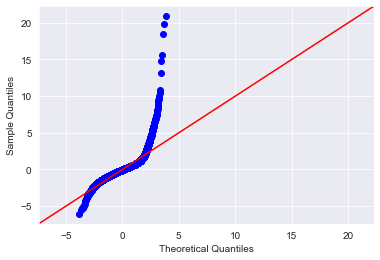

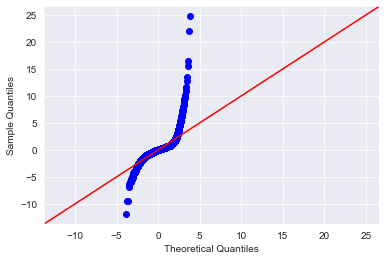

In [13]:
fig = sm.graphics.qqplot(model1.resid, dist=stats.norm, line='45', fit=True)
fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

### Assessment of Linear Regression
- <b>Linearity</b>: Based on the two figures above, it is shown that there is little linearity present due to the occurence of outliers which distort the scatterplots to resemble a cubic parabola curve. As a result, these models fail to prove linearity.
- <b>Homoscedasticity</b>: Based on the two figures above, it is shown that there is little homoscedasticity present due to the high variance of distance between the plotted points and the regression lines which indicated a case of heteroscedasticity. As a result, these models fail to prove homoscedasticity.
- <b>Multicollinearity</b>: The models have an acceptable level of multicollinearity as mentioned under the 'Observations' section above. The occurances of high multicollinearity are not pervasive and frequent enough to fail this condition.
- <b>Autocorrelation</b>: To satisfy this condition, the analysis must show that there is little to no autocorrelation in the data. This can be determined by using the Durbin-Watson test to evaluate the 'd' value. If this value is between 1.5 < d < 2.5, we can argue that there is no auto-correlation in the data. Model 1 has a Durbin-Watson score of 1.988 and Model 2 has a Durbin-Watson score of 1996. As a result, these two models satisfy the condition for autocorrelation.
- <b>Normality</b>: Based on the two figures below, it is shown that the models fail to show the normality condition. For any fixed value of X, y is NOT normally distributed.

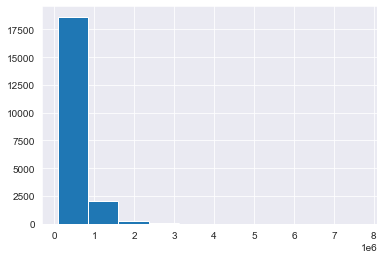

In [14]:
fig2=df.price.hist()

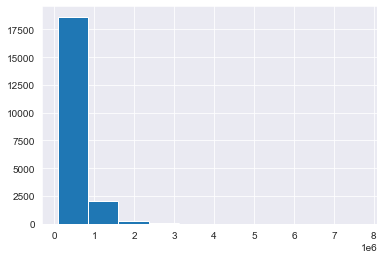

In [15]:
fig2=df2.price.hist()

## Transforming Our Models
Since I have proved that the two previous models have failed to meet the assumptions of linear regression, the data must be transformed in order to have a valid model. I have decided to use a logarithmic transformation for the following reasons:
- Highly positive skewed distribution
- Heteroscedasticity
- Lack of linearity
- Relationship is close to exponential

In [16]:
# The ```price``` variable will be transformed using a logarithmic function.

df2['log_price'] = np.log(df2.price)
outcome = 'log_price'
predictors = df2.drop(columns = ['price','log_price', 'Unnamed: 0', 'id'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula1 = outcome + '~' + pred_sum

In [17]:
model3 = ols(formula=formula1, data=df2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1355.
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:02:17   Log-Likelihood:                 5420.5
No. Observations:               18802   AIC:                        -1.063e+04
Df Residuals:                   18698   BIC:                            -9817.
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.0225      0.001    -19.547      0.000      -0.025      -0.020
quarter_bins[T.2.Q2]             0.0074      0.002      4.953      0.000       0.004       0.010
quarter_bins[T.3.Q3]            -0.0033      0.001     -2.808      0.005      -0.006      -0.001
quarter_bins[T.4.Q4]             0.0028      0.001      3.296      0.001       0.001       0.005
bedroom_bins[T.2.Medium]         0.0160      0.003      5.843      0.000       0.011       0.021
bedroom_bins[T.3.Large]         -0.0168      0.008     -2.201      0.028      -0.032      -0.002
bathrooms_bins[T.2.Medium]       0.0182      0.002      7.337      0.000       0.013       0.023
bathrooms_bins[T.3.Large]       -0.1273      0.017     -7.653      0.000      -0.160      -0.095
floors_bins[T.2.Two]            -0.0156      0.005     -2.954      0.003      -0.026      -0.005
floors_bins[T.3.Three]          -0.0618      0.011     -5.488      0.000      -0.084      -0.040
grade_bins[T.2.Average]          0.0149      0.003      4.595      0.000       0.009       0.021
grade_bins[T.3.AboveAverage]     0.0190      0.006      3.408      0.001       0.008       0.030
grade_bins[T.4.Excellent]       -0.0224      0.009     -2.436      0.015      -0.040      -0.004
age_bins[T.2.Modern]             0.0281      0.003      9.763      0.000       0.022       0.034
age_bins[T.3.New]                0.0751      0.005     16.558      0.000       0.066       0.084
Month                           -0.0131      0.001     -9.922      0.000      -0.016      -0.011
bedrooms                        -0.0055      0.003     -2.117      0.034      -0.011      -0.000
bathrooms                        0.0204      0.004      5.124      0.000       0.013       0.028
sqft_living                      0.0002   3.62e-06     66.127      0.000       0.000       0.000
sqft_lot                      7.312e-07   3.61e-08     20.277      0.000    6.61e-07    8.02e-07
floors                          -0.0172      0.011     -1.620      0.105      -0.038       0.004
waterfront                       0.2239      0.010     23.021      0.000       0.205       0.243
view                             0.0704      0.002     31.040      0.000       0.066       0.075
condition                        0.0769      0.012      6.359      0.000       0.053       0.101
grade                            0.0986      0.003     29.327      0.000       0.092       0.105
sqft_basement                -8.351e-05   4.54e-06    -18.403      0.000   -9.24e-05   -7.46e-05
yr_built                        -0.0015      0.000    -13.511      0.000      -0.002      -0.001
has_renovated                    0.0316      0.004      8.038      0.000       0.024       0.039
zipcode                         -0.0006   7.65e-05     -7.575      0.000    

### Observations
- <b>R-squared</b>: The R-squared values for this new, transformed model has increase to 0.782 from 0.749 and 0.701. This increase indicates that the new model fits the observed data better than the previous models.
- <b>Coefficient</b>: The coefficient values for this model have dropped considerably, but this is to be expected as the data was transformed using a logarithmic function. In order to interpret this change, the following formula can be applied to understand the change: ```log('price') = Intercept + B1 * IV + Error``` which translates to 'One unit increase in the independent variable is associated with a ```B1 * 100``` percent increase in the ```price```.

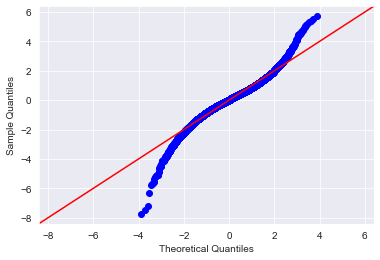

In [18]:
fig = sm.graphics.qqplot(model3.resid, dist=stats.norm, line='45', fit=True)

### Assessment of Linear Regression
- <b>Linearity</b>: Based on the figure above, it is shown that there is linearity present.
- <b>Homoscedasticity</b>: Based on the figure above, it is shown that it is homoscedastic due to the low variance of distance between the plotted points and the regression line.
- <b>Multicollinearity</b>: This model have an acceptable level of multicollinearity. The occurances of high multicollinearity are not pervasive and frequent enough to fail this condition.
- <b>Autocorrelation</b>: To satisfy this condition, the analysis must show that there is little to no autocorrelation in the data. This can be determined by using the Durbin-Watson test to evaluate the 'd' value. If this value is between 1.5 < d < 2.5, we can argue that there is no auto-correlation in the data. This model has a Durbin-Watson score of 1.999. As a result, these two models satisfy the condition for autocorrelation.
- <b>Normality</b>: Based on the figure below, it is shown that the model meets the normality condition.

<AxesSubplot:>

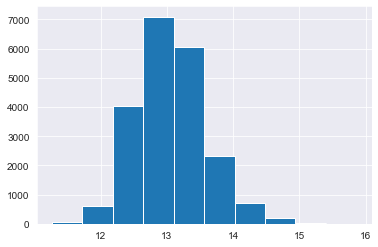

In [19]:
df2.log_price.hist()

Now that our log transformation of our model has satisfied the conditions for linear regression, some additional insight needs to be made on the validity of the model by conducting a train-test-split to determine if this model is over or underfitting.

In [20]:
# Reduce the number of outliers to make our predictive model more accurate to the sample.
df2 = df2[df2['price'] < 2000000]

In [21]:
df2 = df2.drop(columns = ['Unnamed: 0', 'id', 'sqft_basement'], axis =1)
df2

,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199,log_price
0,4,221900,3,1.00,1180,5650,1.0,NaN,0,3,...,0,0,0,0,0,1,0,0,0,12.309982
1,4,538000,3,2.25,2570,7242,2.0,0.0,0,3,...,0,0,0,0,0,0,0,0,0,13.195614
2,1,180000,2,1.00,770,10000,1.0,0.0,0,3,...,0,0,0,0,0,0,0,0,0,12.100712
3,4,604000,4,3.00,1960,5000,1.0,0.0,0,5,...,0,0,0,0,0,0,0,0,0,13.311329
4,1,510000,3,2.00,1680,8080,1.0,0.0,0,3,...,0,0,0,0,0,0,0,0,0,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21137,2,360000,3,2.50,1530,1131,3.0,0.0,0,3,...,0,0,0,0,0,0,0,0,0,12.793859
21138,1,400000,4,2.50,2310,5813,2.0,0.0,0,3,...,0,0,0,0,0,0,0,0,0,12.899220
21139,2,402101,2,1.00,1020,1350,2.0,0.0,0,3,...,0,0,0,0,0,0,0,0,0,12.904459
21140,1,400000,3,2.50,1600,2388,2.0,NaN,0,3,...,0,0,0,0,0,0,0,0,0,12.899220


In [22]:
# Clean the data further by dropping any NaN values that would impede the analysis.
# Drop the dependent variables from analysis.
df2 = df2.dropna()
y = df2.log_price
X = df2.drop(columns = ['price', 'log_price'], axis=1)

In [23]:
# Set up the training/testing samples.
from sklearn.model_selection import train_test_split
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Identify any additional columns that hold NaN values that would impede the analysis.
list(X_train.isnull().any())

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [25]:
# Identified columns with NaN values are replaced with 0.
X_train['quarter_bins'] = X_train['quarter_bins'].fillna(0)
X_train['age_bins'] = X_train['age_bins'].fillna(0)
X_train['bedroom_bins'] = X_train['bedroom_bins'].fillna(0)
X_train['floors_bins'] = X_train['floors_bins'].fillna(0)
X_train['bathrooms_bins'] = X_train['bathrooms_bins'].fillna(0)
X_train['grade_bins'] = X_train['grade_bins'].fillna(0)

In [26]:
len(X_train)

14892

In [27]:
list(X_train)

['Month',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_built',
 'has_renovated',
 'zipcode',
 'lat',
 'long',
 'quarter_bins',
 'bedroom_bins',
 'bathrooms_bins',
 'floors_bins',
 'grade_bins',
 'age_bins',
 'quarter_2Q2',
 'quarter_3Q3',
 'quarter_4Q4',
 'bedrooms_2Medium',
 'bedrooms_3Large',
 'bathroom_2Medium',
 'bathroom_3Large',
 'floors_2Two',
 'floors_3Three',
 'Waterfront_10',
 'View_1',
 'View_2',
 'View_3',
 'View_4',
 'Condition_2',
 'Condition_3',
 'Condition_4',
 'Condition_5',
 'grade_2Average',
 'grade_3AboveAverage',
 'grade_4Excellent',
 'age_2Modern',
 'age_3New',
 'Has_Renovated_1',
 'Zipcode_98002',
 'Zipcode_98003',
 'Zipcode_98004',
 'Zipcode_98005',
 'Zipcode_98006',
 'Zipcode_98007',
 'Zipcode_98008',
 'Zipcode_98010',
 'Zipcode_98011',
 'Zipcode_98014',
 'Zipcode_98019',
 'Zipcode_98022',
 'Zipcode_98023',
 'Zipcode_98024',
 'Zipcode_98027',
 'Zipcode_98028',
 'Zipcode_98029',
 'Zipcode

In [28]:
# Execute training model.
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression()

In [29]:
linreg.coef_

array([-1.03795967e-02, -5.97005181e-03,  1.22232136e-02,  2.10096635e-04,
        7.80813228e-07,  3.46178014e-02,  2.08108075e-01,  6.21031269e-02,
        8.01887017e-02,  1.00913377e-01, -1.59222278e-03,  3.63690740e-02,
        2.79542272e-03,  5.77371029e-01, -3.26714181e-01,  1.85962357e-15,
        2.22044605e-15,  5.06539255e-16, -8.32667268e-17, -4.16333634e-16,
       -2.33146835e-15,  1.28867803e-02, -8.86120341e-03, -1.84799005e-03,
        3.25677859e-02, -2.14453003e-02,  3.14479939e-02, -3.01611637e-01,
       -4.15642585e-02, -1.69406844e-01,  2.08108075e-01,  7.48008271e-02,
       -5.95283031e-03, -2.02233594e-02,  1.49695096e-02,  6.94036391e-03,
        4.47214664e-02,  9.93490587e-03, -1.14998281e-02,  3.32025291e-02,
        5.36019465e-02, -2.45351890e-02,  5.96559181e-02,  1.58742615e-01,
        3.63690740e-02, -1.08798236e-02, -3.81971308e-03,  9.75791644e-01,
        6.39309410e-01,  5.26921198e-01,  5.30983592e-01,  5.16572273e-01,
        3.05797507e-01,  

In [30]:
X.columns

Index(['Month', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade',
       ...
       'Zipcode_98146', 'Zipcode_98148', 'Zipcode_98155', 'Zipcode_98166',
       'Zipcode_98168', 'Zipcode_98177', 'Zipcode_98178', 'Zipcode_98188',
       'Zipcode_98198', 'Zipcode_98199'],
      dtype='object', length=114)

In [31]:
coef_df = pd.DataFrame()

for i in X.columns:
    coef_df[i] = []

In [32]:
arr = np.array(linreg.coef_)
print(f'NumPy Array:\n{arr}')
list1 = arr.tolist()
print(f'List: {list1}')

NumPy Array:
[-1.03795967e-02 -5.97005181e-03  1.22232136e-02  2.10096635e-04
  7.80813228e-07  3.46178014e-02  2.08108075e-01  6.21031269e-02
  8.01887017e-02  1.00913377e-01 -1.59222278e-03  3.63690740e-02
  2.79542272e-03  5.77371029e-01 -3.26714181e-01  1.85962357e-15
  2.22044605e-15  5.06539255e-16 -8.32667268e-17 -4.16333634e-16
 -2.33146835e-15  1.28867803e-02 -8.86120341e-03 -1.84799005e-03
  3.25677859e-02 -2.14453003e-02  3.14479939e-02 -3.01611637e-01
 -4.15642585e-02 -1.69406844e-01  2.08108075e-01  7.48008271e-02
 -5.95283031e-03 -2.02233594e-02  1.49695096e-02  6.94036391e-03
  4.47214664e-02  9.93490587e-03 -1.14998281e-02  3.32025291e-02
  5.36019465e-02 -2.45351890e-02  5.96559181e-02  1.58742615e-01
  3.63690740e-02 -1.08798236e-02 -3.81971308e-03  9.75791644e-01
  6.39309410e-01  5.26921198e-01  5.30983592e-01  5.16572273e-01
  3.05797507e-01  2.02572156e-01  2.05031143e-01  1.53026554e-01
  1.32041078e-01 -1.07619221e-01  3.47073368e-01  3.91398699e-01
  1.04163610

In [33]:
coef_df.loc[len(coef_df)] = list1
coef_df

,Month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Zipcode_98146,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199
0,-0.01038,-0.00597,0.012223,0.00021,7.808132e-07,0.034618,0.208108,0.062103,0.080189,0.100913,...,-0.270938,-0.321988,-0.280514,-0.284614,-0.516877,-0.181229,-0.445742,-0.538051,-0.547025,0.017993


The ```coef_df``` DataFrame above shows how much the mean of the ```price``` variable changes as the independent variables listed in the columns shift while holding other variables in the model constant.

In [34]:
# Identify any additional columns that hold NaN values that would impede the analysis.
list(X_test.isnull().any())

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False]

In [35]:
# Identified columns with NaN values are replaced with 0.
X_test['quarter_bins'] = X_test['quarter_bins'].fillna(0)
X_test['age_bins'] = X_test['age_bins'].fillna(0)
X_test['grade_bins'] = X_test['grade_bins'].fillna(0)
X_test['floors_bins'] = X_test['floors_bins'].fillna(0)
X_test['bathrooms_bins'] = X_test['bathrooms_bins'].fillna(0)
X_test['bedroom_bins'] = X_test['bedroom_bins'].fillna(0)

In [36]:
len(coef_df)

1

In [37]:
len(X_test)

3723

In [38]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [39]:
y_hat_test = np.exp(y_hat_test)
y_hat_train = np.exp(y_hat_train)

In [40]:
y_test = np.exp(y_test)
y_train = np.exp(y_train)

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
mean_squared_error(y_train, y_hat_train, squared=False)

109331.18006413215

In [43]:
mean_squared_error(y_test, y_hat_test, squared=False)

107114.10955354954

Awesome! It does not seem like there is a big difference between the train and test MSE. This indicates to me that this is a model with good fit.

In [44]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat_test)

0.8532218381007957

The r-squared value validates my assessment that this model has good fit.

## Conclusions
```model3``` appears to be a usable model for predictions. 
- <b>Limitations</b>: There appears to be 3 main limitations that could limit the predictive accuracy of my model:
    1. Houses with a <b>price > $2,000,000</b>.
    2. Houses that have <b>views > 2</b>.
    3. Houses located in the <b>zipcodes 98002 and 98003</b>.

In [45]:
df2.price.describe()

count    1.861500e+04
mean     5.194341e+05
std      2.871353e+05
min      7.800000e+04
25%      3.200000e+05
50%      4.500000e+05
75%      6.350000e+05
max      1.990000e+06
Name: price, dtype: float64

In [46]:
df2.price.mean()

519434.08665055066

In [56]:
df2

,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199,log_price
1,4,538000,3,2.25,2570,7242,2.0,0.0,0,3,...,0,0,0,0,0,0,0,0,0,13.195614
2,1,180000,2,1.00,770,10000,1.0,0.0,0,3,...,0,0,0,0,0,0,0,0,0,12.100712
3,4,604000,4,3.00,1960,5000,1.0,0.0,0,5,...,0,0,0,0,0,0,0,0,0,13.311329
4,1,510000,3,2.00,1680,8080,1.0,0.0,0,3,...,0,0,0,0,0,0,0,0,0,13.142166
5,2,1230000,4,4.50,5420,101930,1.0,0.0,0,3,...,0,0,0,0,0,0,0,0,0,14.022525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21136,1,475000,3,2.50,1310,1294,2.0,0.0,0,3,...,0,0,0,0,0,0,0,0,0,13.071070
21137,2,360000,3,2.50,1530,1131,3.0,0.0,0,3,...,0,0,0,0,0,0,0,0,0,12.793859
21138,1,400000,4,2.50,2310,5813,2.0,0.0,0,3,...,0,0,0,0,0,0,0,0,0,12.899220
21139,2,402101,2,1.00,1020,1350,2.0,0.0,0,3,...,0,0,0,0,0,0,0,0,0,12.904459


In [57]:
df2['log_price'] = np.log(df2.price)
outcome = 'log_price'
predictors = df2.drop(columns = ['price','log_price'], axis=1)
pred_sum = '+'.join(predictors.columns)
formula1 = outcome + '~' + pred_sum

In [58]:
model4 = ols(formula=formula1, data=df2).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1205.
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:10:05   Log-Likelihood:                 5437.8
No. Observations:               18615   AIC:                        -1.067e+04
Df Residuals:                   18512   BIC:                            -9863.
Df Model:                         102                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.0213      0.001    -18.595      0.000      -0.024      -0.019
quarter_bins[T.2.Q2]             0.0073      0.002      4.826      0.000       0.004       0.010
quarter_bins[T.3.Q3]            -0.0032      0.001     -2.714      0.007      -0.005      -0.001
quarter_bins[T.4.Q4]             0.0025      0.001      2.916      0.004       0.001       0.004
bedroom_bins[T.2.Medium]         0.0162      0.003      5.922      0.000       0.011       0.022
bedroom_bins[T.3.Large]         -0.0131      0.008     -1.685      0.092      -0.028       0.002
bathrooms_bins[T.2.Medium]       0.0151      0.002      6.062      0.000       0.010       0.020
bathrooms_bins[T.3.Large]       -0.1397      0.023     -6.178      0.000      -0.184      -0.095
floors_bins[T.2.Two]            -0.0185      0.005     -3.491      0.000      -0.029      -0.008
floors_bins[T.3.Three]          -0.0817      0.011     -7.263      0.000      -0.104      -0.060
grade_bins[T.2.Average]          0.0129      0.003      3.991      0.000       0.007       0.019
grade_bins[T.3.AboveAverage]     0.0200      0.006      3.585      0.000       0.009       0.031
grade_bins[T.4.Excellent]       -0.0205      0.009     -2.178      0.029      -0.039      -0.002
age_bins[T.2.Modern]             0.0324      0.003     11.261      0.000       0.027       0.038
age_bins[T.3.New]                0.0805      0.005     17.740      0.000       0.072       0.089
Month                           -0.0129      0.001     -9.768      0.000      -0.016      -0.010
bedrooms                        -0.0058      0.003     -2.239      0.025      -0.011      -0.001
bathrooms                        0.0115      0.004      2.864      0.004       0.004       0.019
sqft_living                      0.0002    3.3e-06     64.040      0.000       0.000       0.000
sqft_lot                      7.714e-07   3.65e-08     21.106      0.000       7e-07    8.43e-07
floors                           0.0283      0.010      2.731      0.006       0.008       0.049
waterfront                       0.2212      0.011     19.650      0.000       0.199       0.243
view                             0.0637      0.002     27.038      0.000       0.059       0.068
condition                        0.0751      0.012      6.234      0.000       0.051       0.099
grade                            0.1027      0.003     30.555      0.000       0.096       0.109
yr_built                        -0.0016      0.000    -14.866      0.000      -0.002      -0.001
has_renovated                    0.0306      0.004      7.692      0.000       0.023       0.038
zipcode                         -0.0005   7.65e-05     -6.906      0.000      -0.001      -0.000
lat                              0.5686      0.077      7.396      0.000    

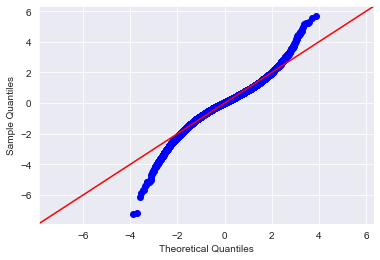

In [59]:
fig = sm.graphics.qqplot(model4.resid, dist=stats.norm, line='45', fit=True)